<h1 align="center">Física Computacional.</h1>
<h1 align="center">Semestre 2015-1</h1>

<h2>Sergio A. Alcalá Corona </h2> 

---
### Rodrigo Vega Vilchis
### Joel Gómez Uribe
---

<h1 align="center" font-weight="bold">Tarea-Práctica 6. <br>Métodos numéricos básicos en física computacional</h1> 
<h2 align="center">Diferenciación numérica</h2> 
<hr>

In [120]:
import math as mt
import matplotlib.pyplot as plt
import numpy as np
from scipy import constants

plt.rcParams.update({
    "text.usetex": True,
})

<h2>1. Diferenciación numérica</h2>

Crea una función por el usuario $f(x)$ dque devuelva el valor $1 + \tfrac{1}{2}\tanh(2x)$, luego usa una <strong>diferencia central</strong> para calcular la derivada de la función en el rango $-2 \leq x \leq 2$. Calcula la derivada analíticamente y haz una gráfica con tu resultado numérico y la respuesta analítica en el mismo gráfico. Puede resultar útil graficar la respuesta exacta como líneas y la númerica como puntos. (Hint: usa la función ``tanh`` del paquete ``math``).

In [2]:
f = lambda x: 1 + 0.5 * (mt.tanh(2 * x))
df = lambda x: (1 / mt.cosh(2 * x)) ** 2

def diferencia_central(f, x, h):
    return (f(x + h) - f(x - h)) / (2*h)

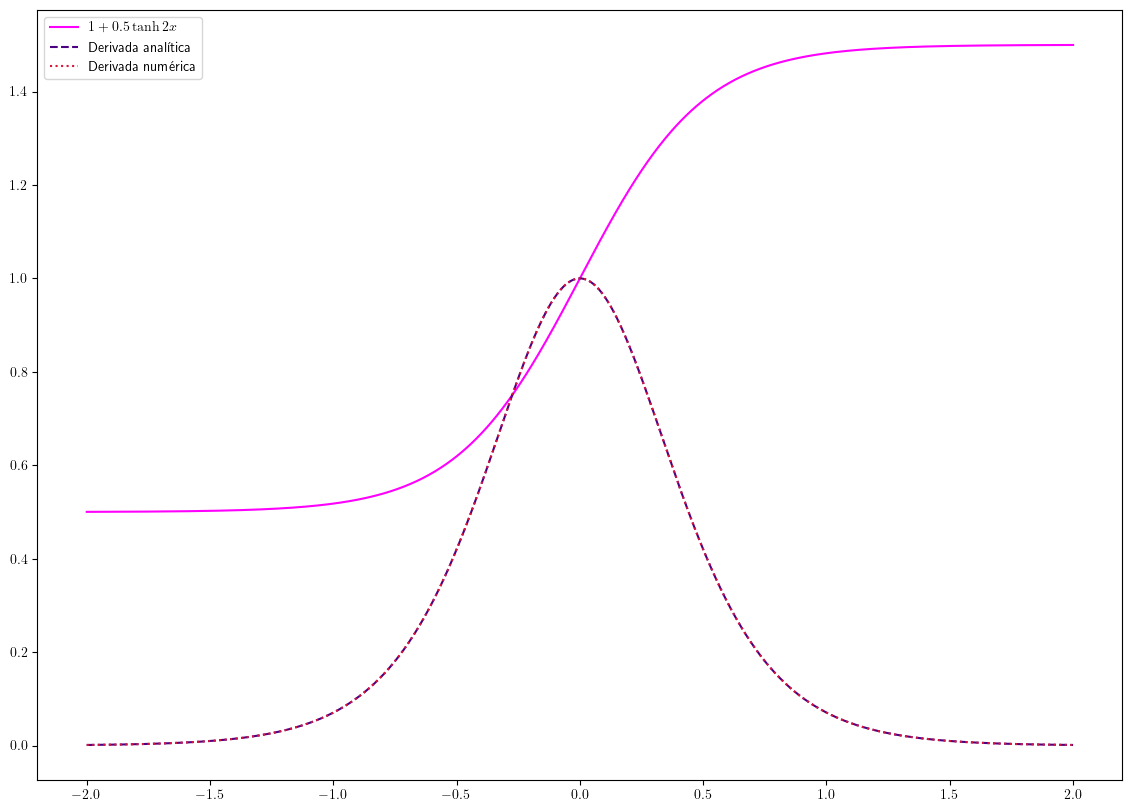

In [3]:
h = 1e-10
x = np.linspace(-2, 2, 1000)
fx = [f(i) for i in x] # Puntos de la función
fx_anal = [df(i) for i in x] # Puntos de la derivada analítica
fx_num = [diferencia_central(f, i, h) for i in x] # Puntos de la derivada numérica


plt.figure(figsize=(14, 10))
plt.plot(x, fx, color="magenta", label=r"$1 + 0.5\tanh{2x}$")
plt.plot(x, fx_anal, '--', color="indigo", label="Derivada analítica")
plt.plot(x, fx_num, ":", color="crimson", label="Derivada numérica")
plt.legend()
plt.show()

<h2>2. Campo eléctrico de una distribución de cargas</h2>

<h3>(a) Gráfica de densidad del potencial</h3>

Calculamos el potencial neto del dipolo $\Phi$ a partir de

$$
\begin{equation*}
    \Phi = k \Biggl(\dfrac{q_{1}}{r_{1}} - \dfrac{q_{2}}{r_{2}}\Biggr),
\end{equation*}
$$

considerando que $q_{2}$ tiene carga negativa.

In [304]:
def PotencialDipolo(x1_init, y1_init, x2_init, y2_init, placa_len=100, cargas_sep=10, ϵ=1e2):
    k = 1 / (4 * np.pi * constants.epsilon_0)
    potencial = np.zeros([placa_len, placa_len])

    for i in range(placa_len):
        for j in range(placa_len):
            r1 = np.sqrt((i - x1_init) ** 2 + (j - y1_init) ** 2) + ϵ # Más un factor ϵ para evitar indeterminaciones
            r2 = np.sqrt((i - x2_init) ** 2 + (j - y2_init) ** 2) + ϵ
            potencial[i, j] = 1 / r1 - 1 / r2
    return k * potencial

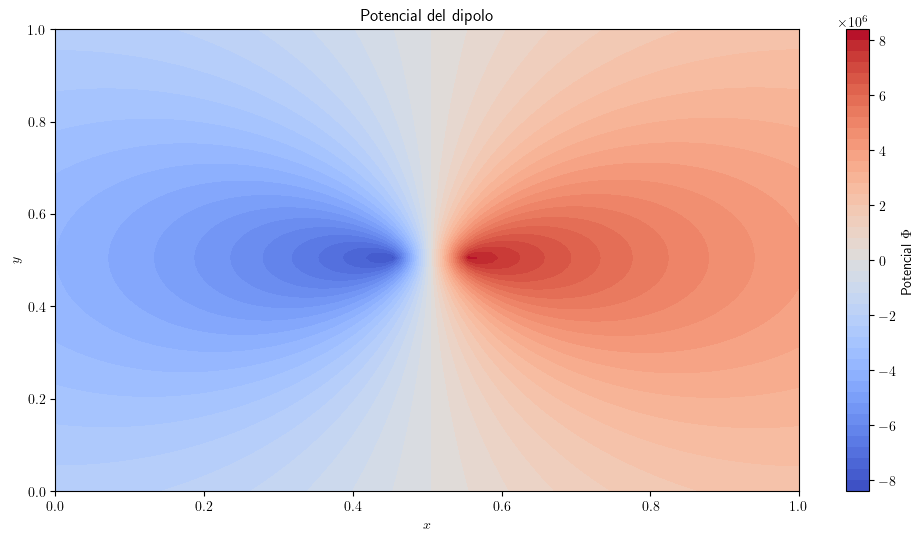

In [305]:
# Fijamos la posición de las cargas
x1, y1 = 50, 55# Posición de la carga positiva
x2, y2 = 50, 45 # Posición de la carga negativa

# Gráfica de densidad del potencial del dipolo
X = np.linspace(0, 1, 100)
Y = np.linspace(0, 1, 100)
potencial = PotencialDipolo(x1, y1, x2, y2)

plt.figure(figsize=(12, 6))
plt.contourf(X, Y, potencial, cmap="coolwarm", levels=50)
plt.title("Potencial del dipolo")
plt.colorbar(label="Potencial $\\Phi$")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.show()

<h3>(b) Campo eléctrico</h3>

Lo calculamos a partir de

$$
\begin{equation*}
    \vec{E} = -\nabla\Phi.
\end{equation*}
$$

In [306]:
## Gradiente
def Gradiente(data, h):
    Df_x = np.zeros_like(data)
    Df_y = np.zeros_like(data)
    Y, X = data.shape
    
    for x in range(X - 1):
        for y in range(Y - 1):
            Df_x[y, x] = (data[y, x + 1] - data[y, x - 1]) / (2 * h)
            Df_y[y, x] = (data[y + 1, x] - data[y - 1, x]) / (2 * h)

    return Df_x, Df_y

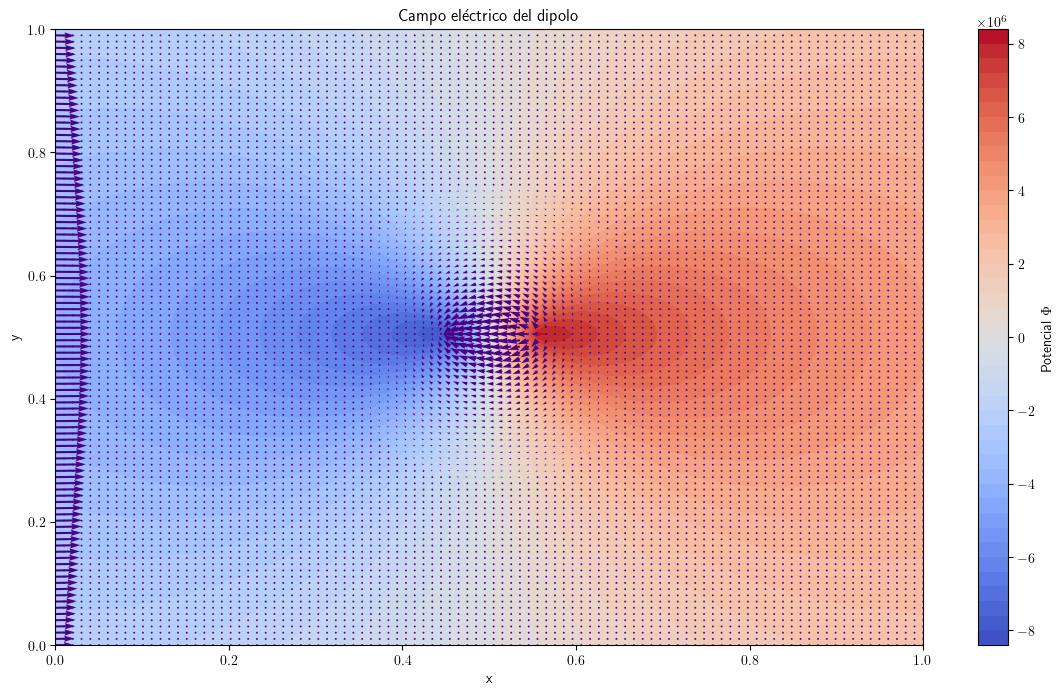

In [307]:
# Componentes del campo eléctrico
Ex, Ey = Gradiente(potencial, 1e-2)

# Malla
x = np.linspace(0, 1, 100)
y = np.linspace(0, 1, 100)
X, Y = np.meshgrid(x, y)

plt.figure(figsize=(14, 8))
plt.contourf(X, Y, potencial, levels=50, cmap='coolwarm')
plt.colorbar(label="Potencial $\\Phi$")
plt.quiver(X, Y, -Ex, -Ey, color="indigo", scale=10000000000)
# plt.streamplot(X, Y, -Ex, -Ey, color="red")
plt.title('Campo eléctrico del dipolo')
plt.xlabel('x')
plt.ylabel('y')
plt.ylim(0,1)
plt.show()

<h3>(c) Distribución continua de carga</h3>

Para el caso continuo vamos a calcular el potencial 

$$
\begin{equation*}
    V(x, y, z) = \dfrac{1}{4\pi\epsilon_{0}}\iint_{\Omega}\dfrac{\sigma(u, v)}{\sqrt{(x - u)^{2} + (y - v)^{2} + z}}\text{d}u\text{d}v,
\end{equation*}
$$

donde

$$
    \begin{equation*}
        \sigma(x, y) = q_{0}\sin\Bigl(\tfrac{2\pi x}{L}\Bigr)\sin\Bigl(\tfrac{2\pi y}{L}\Bigr).
    \end{equation*}
$$



In [ ]:
L = 10 # cm
q0 = 100 # C / m^2


<h2>3. Procesamiento de imágenes y STM</h2>

<h3>(a) Cálculo de derivadas</h3>

In [102]:
altitudes = np.loadtxt("altitudes.txt") # w(x, y)

In [103]:
def diferenciacion_datos(data, h):
    # Prelocalización de arreglos
    Dx = np.zeros(data.shape)
    Dy = np.zeros_like(Dx)
    Y, X = Dx.shape # Renglones, Columnas

    # Cálculo de las derivadas sin considerar las fronteras
    for y in range(1, Y - 1):
        for x in range(1, X - 1):
            Dx[y, x] = (data[y, x + 1] - data[y, x - 1]) / (2 * h)
            Dy[y, x] = (data[y + 1, x] - data[y - 1, x]) / (2 * h)
    
    # Derivadas en las fronteras
    # Bordes superior e inferior para Dx
    for x in range(X):
        Dx[0, x] = (data[0, x + 1] - data[0, x]) / h if x < X - 1 \
        else (data[0, x] - data[0, x - 1]) / h
        Dx[Y - 1, x] = (data[Y - 1, x + 1] - data[Y - 1, x]) / h if x < X - 1 \
        else (data[Y - 1, x] - data[Y - 1, x - 1]) / h
    
    # Bordes izquierdo y derecho para Dy
    for y in range(Y):
        Dy[y, 0] = (data[y + 1, 0] - data[y, 0]) / h if y < Y - 1 \
        else (data[y, 0] - data[y - 1, 0]) / h
        Dy[y, X - 1] = (data[y + 1, X - 1] - data[y, X - 1]) / h if y < Y - 1 \
        else (data[y, X - 1] - data[y - 1, X - 1]) / h

    return Dx, Dy

In [104]:
h = 3e4 # 30000 m
Dx, Dy = diferenciacion_datos(altitudes, h)

<h3>(b) Cálculo de la intensidad para $\phi = \tfrac{\pi}{4}$</h3>

In [105]:
# Intensidad de iluminación
def I(Dx, Dy, ang=np.pi/4):
    return (np.cos(ang) * Dx + np.sin(ang) * Dy) \
    / np.sqrt(Dx ** 2 + Dy ** 2 + 1)

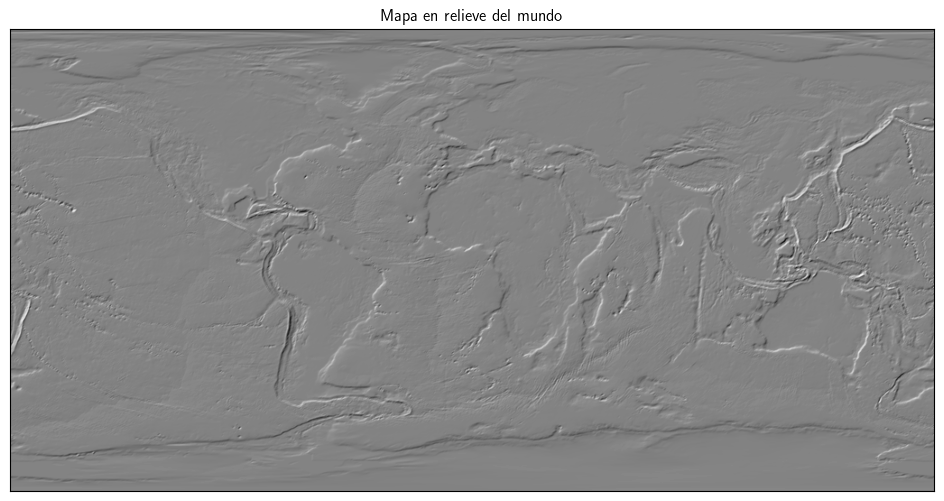

In [108]:
plt.figure(figsize=(14, 6))
plt.imshow(I(Dx, Dy), cmap="Greys")
plt.title("Mapa en relieve del mundo")
plt.xticks([])
plt.yticks([])

plt.show()

<h3>(c) STM</h3>

In [109]:
stm = np.loadtxt("stm.txt")

In [110]:
h = 2.5 # unidades arbitrarias
Dx, Dy = diferenciacion_datos(stm, h)

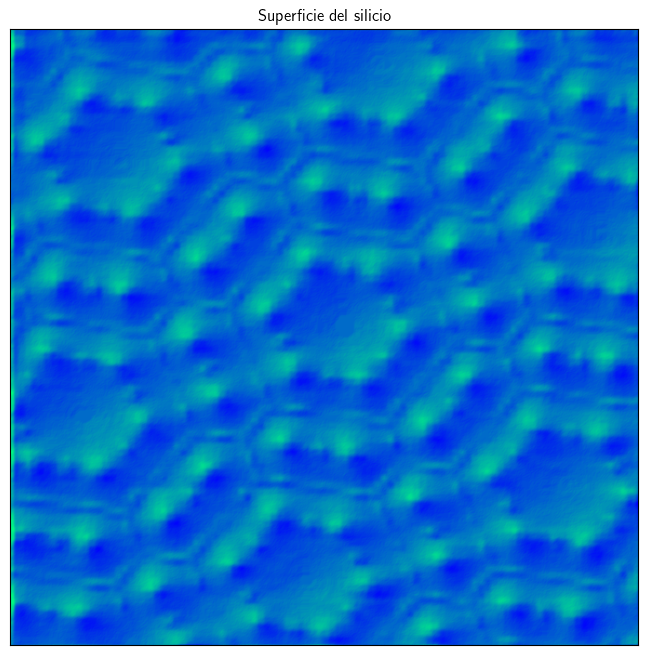

In [118]:
plt.figure(figsize=(12, 8))
plt.imshow(I(Dx, Dy), cmap="winter")
plt.title("Superficie del silicio")
plt.xticks([])
plt.yticks([])
plt.show()